### **Task # 4 - To Explore Decision Tree Algorithm**
For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

### **Importing Libraries**

In [64]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

### **Reading The Dataset**

In [66]:
# Reading the iris dataset
iris = pd.read_csv("iris_dataset.csv")

### **Visualising Dataset**

In [67]:
print('dataset')
iris.head(10)

dataset


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [89]:
#shape of dataset
print('The shape of dataset is:')
iris.shape

The shape of dataset is:


(150, 5)

In [69]:
#columns and their names in dataset
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [70]:
#number of flower of each species
iris['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [71]:
#structure and information of dataset
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [72]:
#description of dataset
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [73]:
#check missing value
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

We observed that there is no missing value in dataset

### **Visualising the dataset by plotting different plots**

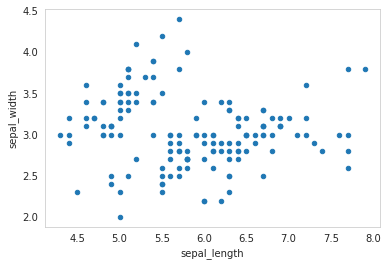

In [74]:
#plotting of dataset on the basis of sepal_length vs sepal_width
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width',);
plt.grid()
plt.show()

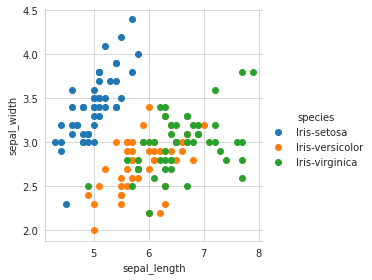

In [75]:
# 'sns' corresponds to seaborn
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="species", height=4).map(plt.scatter,"sepal_length","sepal_width").add_legend();
plt.show()


We observed that the blue points can be separated easily from red and green by drawing a line. 
But red and green can not be separated easily as shown above.

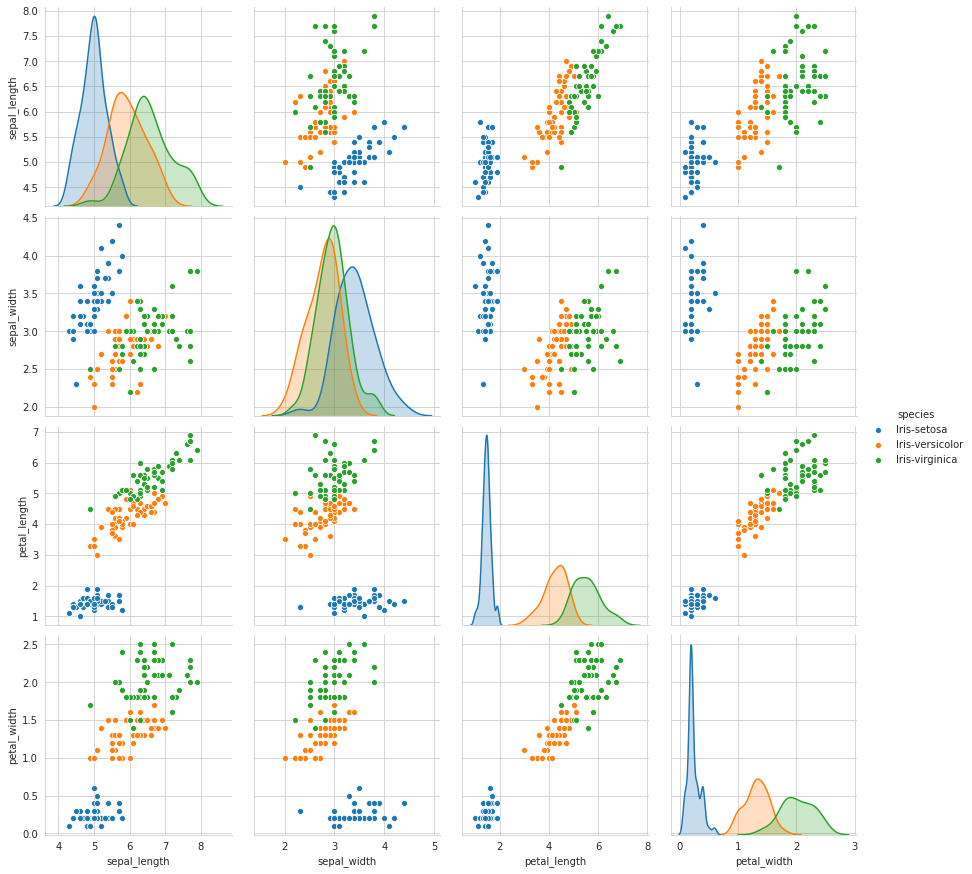

In [76]:
#pairwise scatter plot: Pair-Plot
#only visible in 2D
plt.close();
sns.set_style("whitegrid");
sns.pairplot(iris, hue="species", height=3);
plt.show()

**Observations:**


1. petal_length and petal_width are the most useful features to classify various flower types.
2.   While Setosa can be easily identified (linearly separable), Virginica and Versicolor have some overlap(almost linearly separable).


## **Preprocessing**

In [77]:
#preparing the data
X = iris.iloc[:, 1:4].values
y = iris.iloc[:, -1].values

In [78]:
#Label Encoding The Data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [79]:
#spliting The dataset in Training and Testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


### **Defining The Decision Tree algorithm**

In [80]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X,y)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


## **Training the model**

In [90]:
#defining decision tree classifier for Training dataset
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### **Testing the model**

In [82]:
#predicting the Test data result
y_predicted = dtree.predict(X_test, check_input = True)

### **Comparison of actual and predicted data**

In [83]:
#comparing actual and predicted data
df = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predicted})
df

,Actual value,Predicted value
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


**Evaluating Accuracy of The Model**

In [84]:
#Error Calculation
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_predicted)) 


Mean Absolute Error: 0.022222222222222223


In [85]:
#Accuracy Calculation
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predicted)
print('The Accuracy of Model is: ', accuracy)

The Accuracy of Model is:  0.9777777777777777


The accuracy of Model is 97.77%

## **Visualization**

[Text(892.8, 1467.72, 'X[1] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(669.5999999999999, 1141.56, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(1116.0, 1141.56, 'X[1] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(446.4, 815.4000000000001, 'X[2] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(223.2, 489.24, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(669.5999999999999, 489.24, 'X[0] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(446.4, 163.08000000000015, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(892.8, 163.08000000000015, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(1785.6, 815.4000000000001, 'X[1] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(1562.3999999999999, 489.24, 'X[0] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(1339.1999999999998, 163.08000000000015, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(1785.6, 163.0800000000

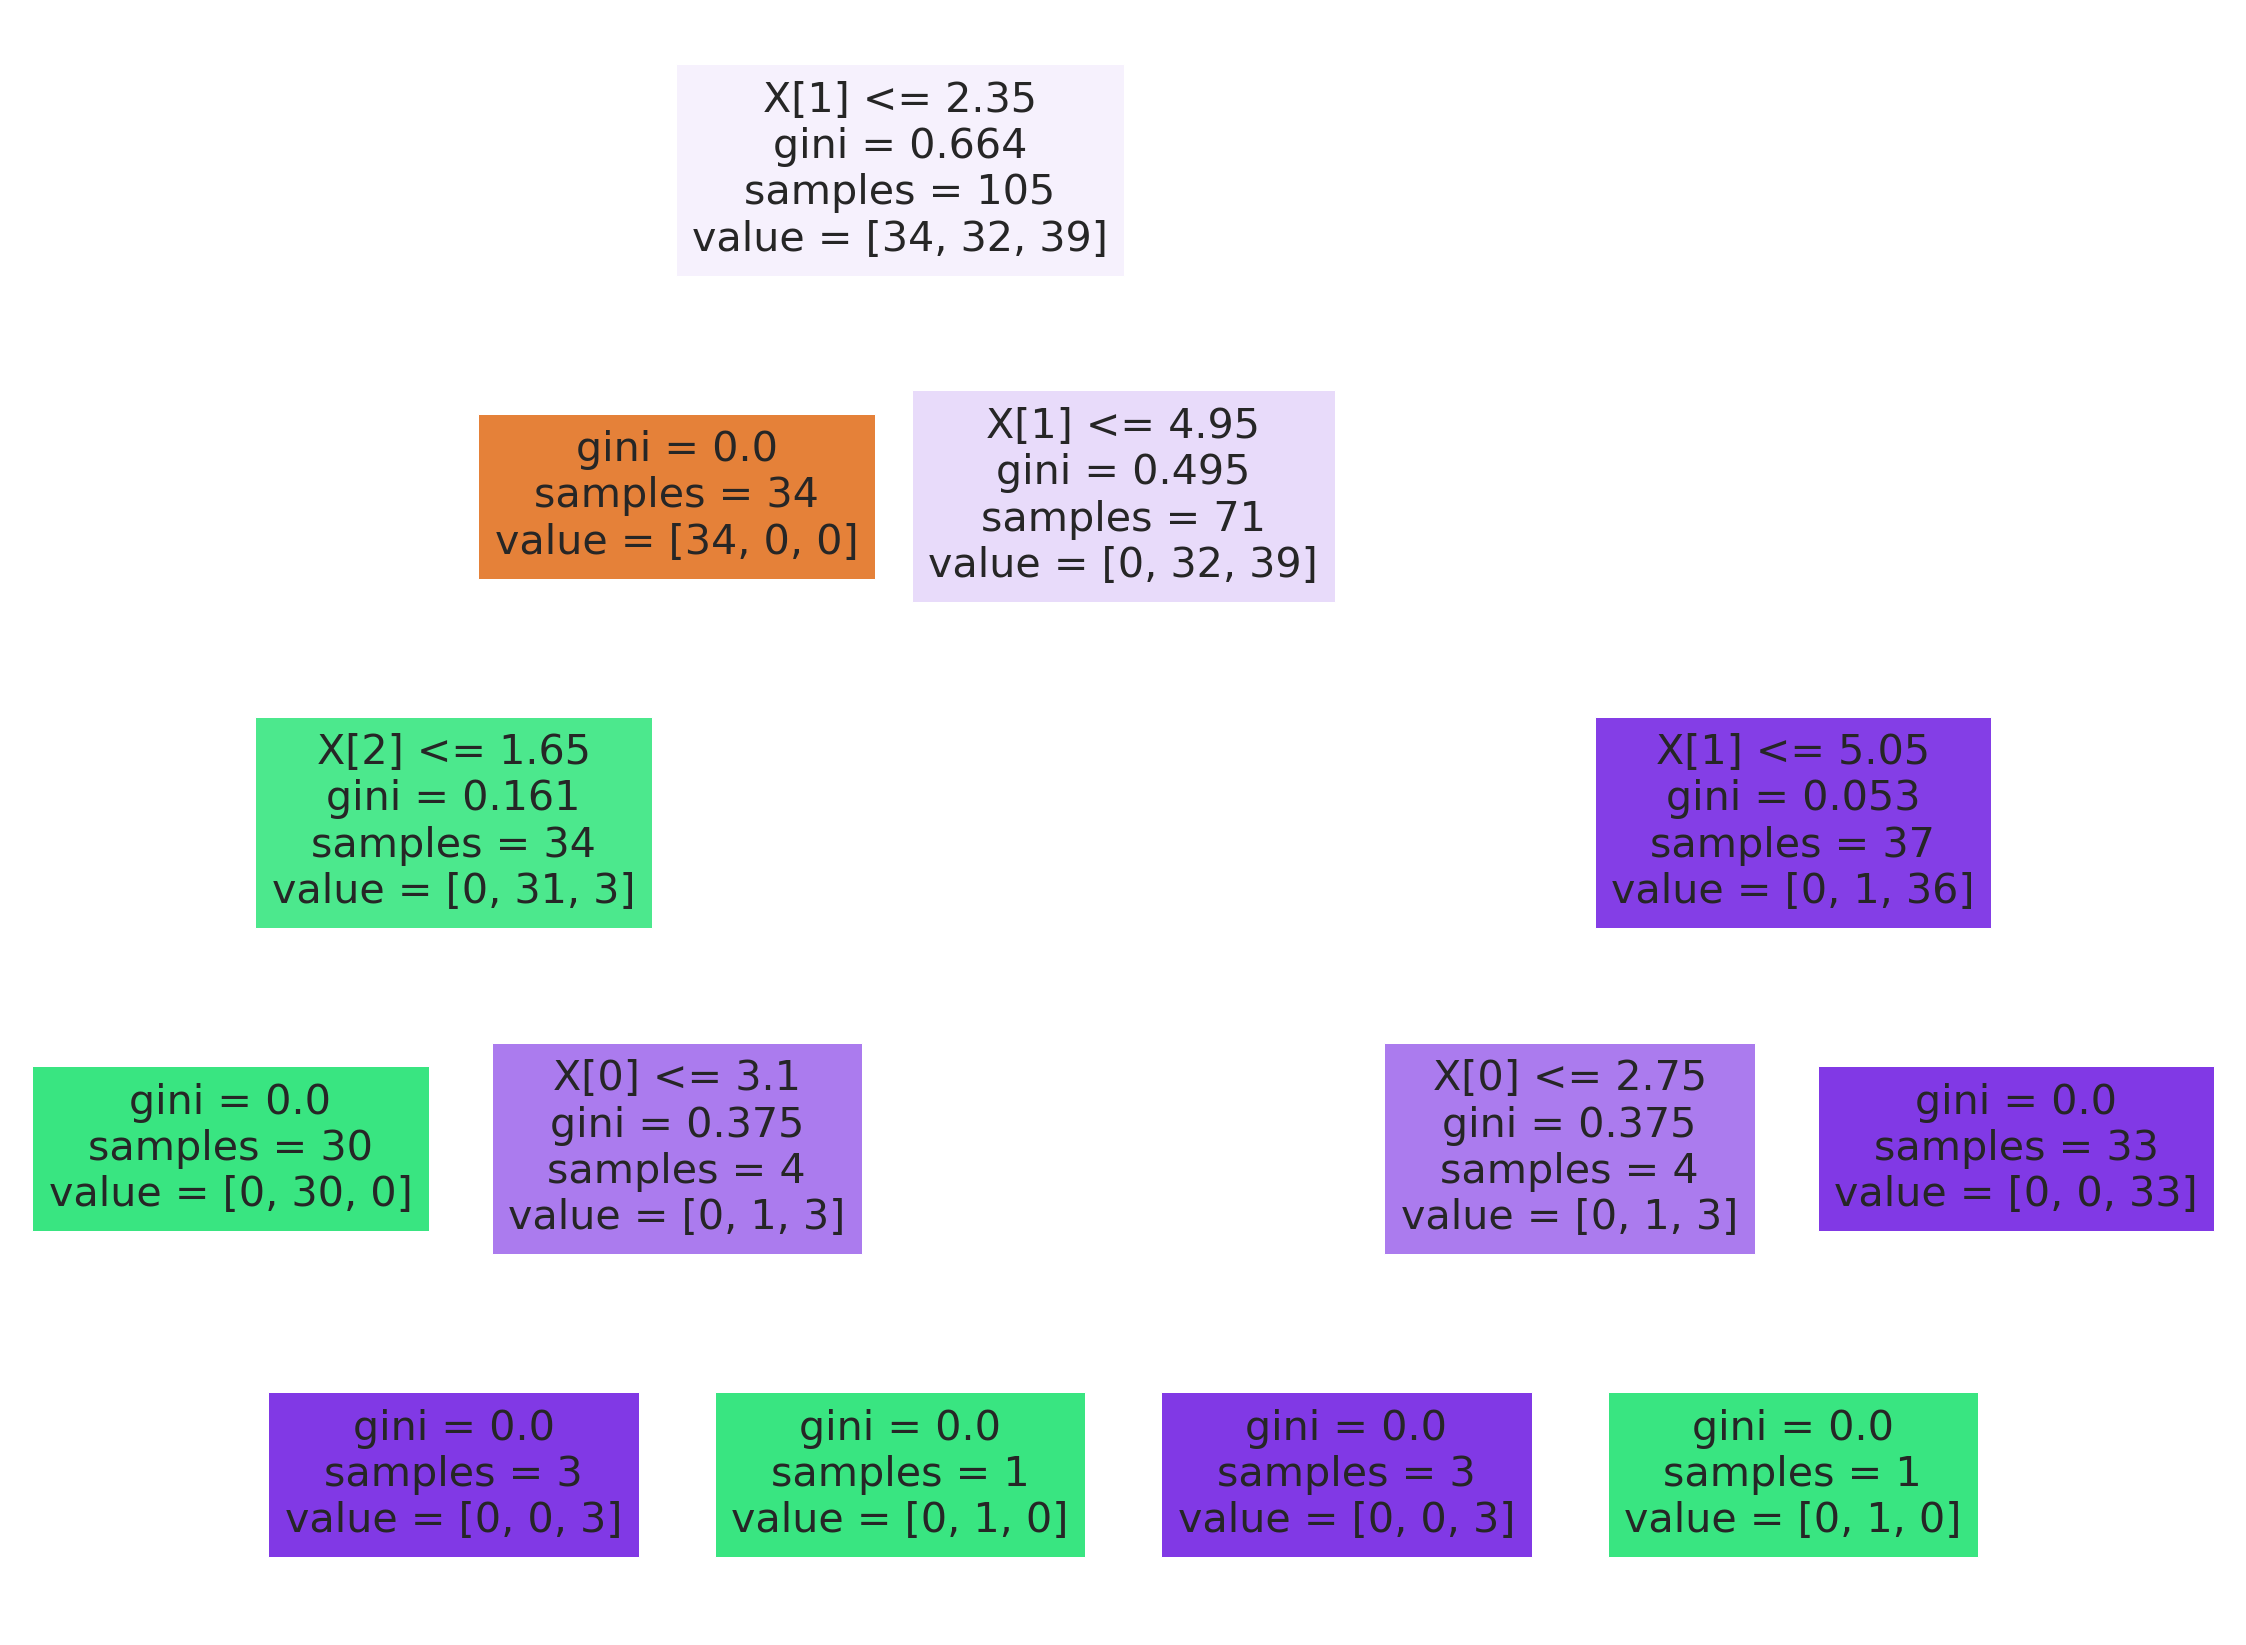

In [87]:
from sklearn.tree import plot_tree
plt.figure(figsize=(40,30))
plot_tree (dtree, filled = True)